In [1]:
import pandas as pd
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams['font.sans-serif'] = ['SimHei']
my_font = font_manager.FontProperties(fname="C:/WINDOWS/Fonts/FZWBJW.TTF")              # 字体设置

bra_dataset = pd.read_csv("D:/deep-learning/datasets/bra.csv")          # 读入bra.csv数据
color_dataset = pd.read_csv("D:/deep-learning/datasets/colors.csv", encoding = 'GB2312')                 # 读入colors.csv数据
bra_dataset.head(), color_dataset.head()

(          creationTime productColor productSize
 0  2016-06-08 17:17:00        22咖啡色         75C
 1  2017-04-07 19:34:25        22咖啡色         80B
 2  2016-06-18 19:44:56         02粉色         80C
 3  2017-08-03 20:39:18        22咖啡色         80B
 4  2016-07-06 14:02:08        22咖啡色         75B,
    Unnamed: 0 productColor colors
 0           0        22咖啡色     棕色
 1           1         02粉色     粉色
 2           2        071蓝色     蓝色
 3           3        071黑色     黑色
 4           4        071肤色     肤色)

In [2]:
bra_merge = pd.merge(bra_dataset, color_dataset, on = 'productColor', how = 'left')
bra_merge.drop('Unnamed: 0', axis = 1, inplace = True)
bra_merge.drop('productColor', axis = 1, inplace = True)
bra_merge.drop('creationTime', axis = 1, inplace = True)
print(bra_merge)

      productSize colors
0             75C     棕色
1             80B     棕色
2             80C     粉色
3             80B     棕色
4             75B     棕色
...           ...    ...
15492     38B/85B     粉色
15493     36C/80C     粉色
15494     34A/75A     黑色
15495     34B/75B     粉色
15496     36A/80A     黑色

[15497 rows x 2 columns]


In [3]:
'''数据清洗'''
import re        # 正则表达式
def clean(bra_merge):
    pattern_A = re.compile(r'[7-9]\d[A-Z]', re.I)
    pattern_B = re.compile(r'[A-Z][7-9]\d', re.I)
    for i in range(len(bra_merge['productSize'])):
        try:
            size_s = pattern_A.findall(bra_merge['productSize'][i])
            size_r = pattern_B.findall(bra_merge['productSize'][i])

            if size_s:
                bra_merge['productSize'][i] = size_s[0].upper()
            if size_r:
                bra_merge['productSize'][i] = size_r[0][1:] + size_r[0][0].upper()
        except:
            continue
    return bra_merge

bra_dataset_cleaned = clean(bra_merge)
bra_dataset_cleaned.dropna(how = 'any', subset = ['productSize'], inplace = True)
bra_dataset_cleaned = bra_dataset_cleaned[~bra_dataset_cleaned['productSize'].isin(['170/82/XL'])]
bra_dataset_cleaned = bra_dataset_cleaned[~bra_dataset_cleaned['productSize'].isin(['160/70/M'])]
bra_dataset_cleaned = bra_dataset_cleaned[~bra_dataset_cleaned['productSize'].isin(['165/76/L'])]
bra_dataset_cleaned['productSize'] = bra_dataset_cleaned['productSize'].str.replace('85/38C','85C').astype('object')
print(bra_dataset_cleaned)

      productSize colors
0             75C     棕色
1             80B     棕色
2             80C     粉色
3             80B     棕色
4             75B     棕色
...           ...    ...
15492         85B     粉色
15493         80C     粉色
15494         75A     黑色
15495         75B     粉色
15496         80A     黑色

[15156 rows x 2 columns]


In [4]:
bra_data = np.array(bra_dataset_cleaned, dtype = '<U18')
bra_data

array([['75C', '棕色'],
       ['80B', '棕色'],
       ['80C', '粉色'],
       ...,
       ['75A', '黑色'],
       ['75B', '粉色'],
       ['80A', '黑色']], dtype='<U18')

In [5]:
'''频数统计并去前20名'''
size, size_count = np.unique(bra_data[:, 0], return_counts = True)
color, color_count = np.unique(bra_data[:, 1], return_counts = True)
size_sorted = size[size_count.argsort()]
size_top = size_sorted[-10:]
size_count.sort()
size_count_top = size_count[-10:]
color_sorted = color[color_count.argsort()]
color_top = color_sorted[-20:]
color_count.sort()
color_count_top = color_count[-20:]
color

array(['棕色', '灰色', '粉色', '紫色', '红色', '绿色', '肤色', '蓝色', '黄色', '黑色'],
      dtype='<U18')

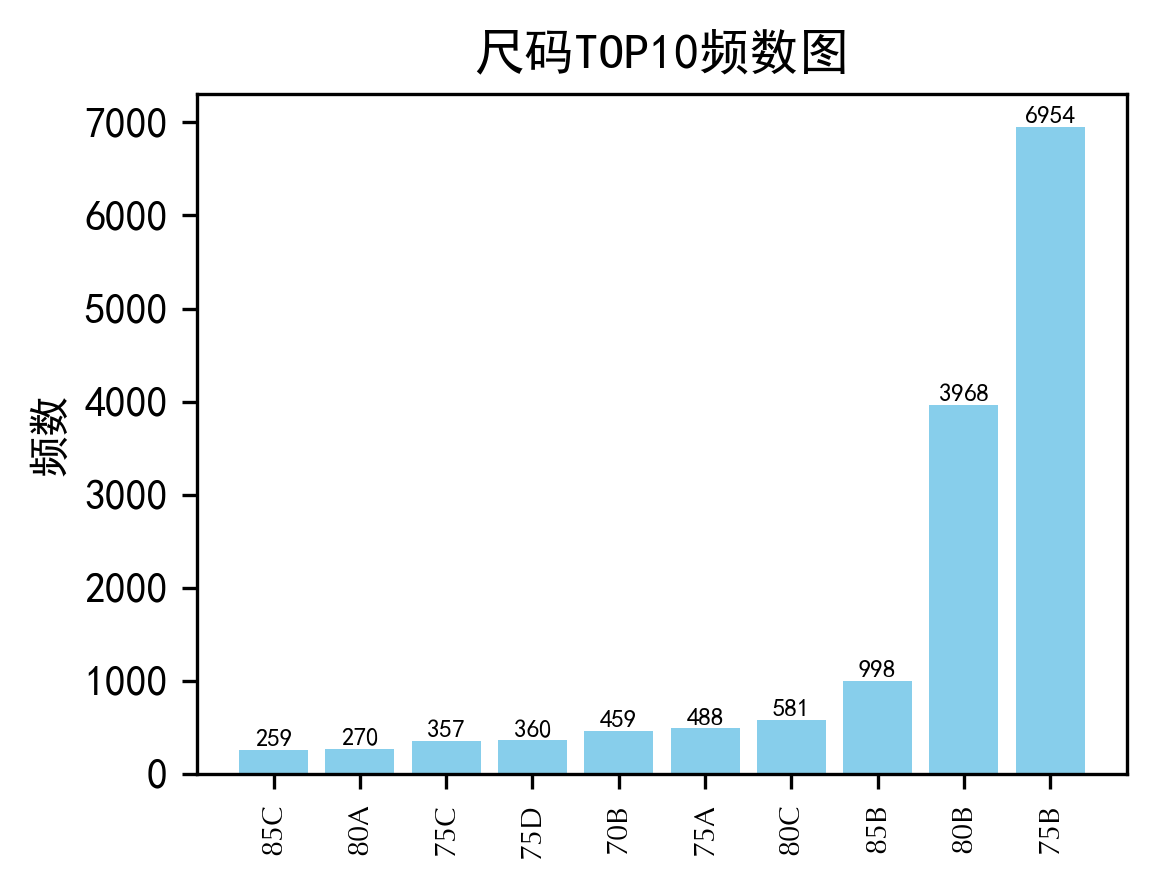

In [6]:
'''画图'''
plt.figure(figsize = (4, 3), dpi = 300)
plt.title('尺码TOP10频数图')
plt.ylabel('频数')
plt.bar(size_top, size_count_top, color = 'skyblue')
plt.xticks(size_top, rotation = 90, fontproperties = my_font, fontsize = 7)
for a, b in zip(size_top, size_count_top):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 6)
plt.show()

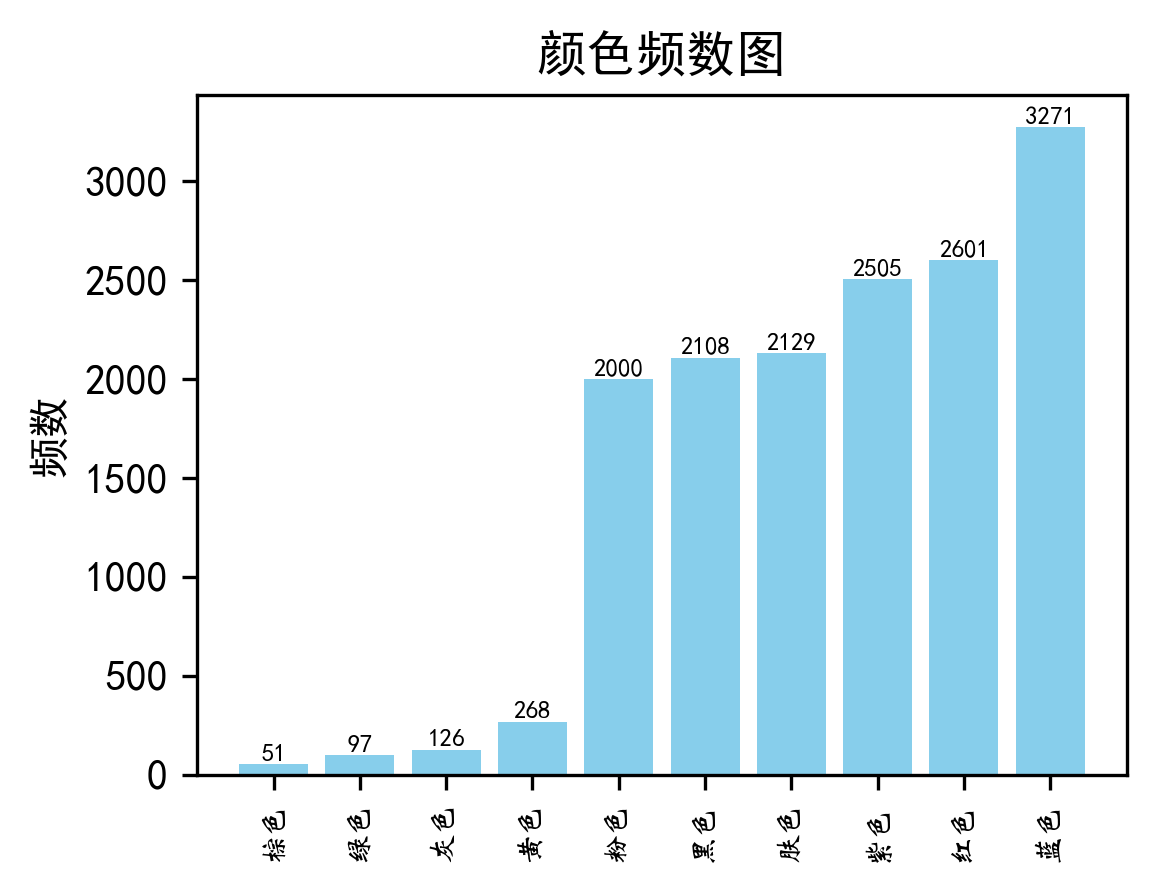

In [7]:
plt.figure(figsize = (4, 3), dpi = 300)
plt.title('颜色频数图')
plt.ylabel('频数')
plt.bar(color_top, color_count_top, color = 'skyblue')
plt.xticks(color_top, rotation = 90, fontproperties = my_font, fontsize = 7)
for a, b in zip(color_top, color_count_top):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 6)
plt.show()

In [8]:
'''组合分析'''
# def reference(bra_dataset):
# bra_com = np.array()
# com, com_count = np.unique([bra_data[:,0] + bra_data[:,1]], return_counts = True)
# com, com_count
a = list(zip(bra_dataset_cleaned['productSize'], bra_dataset_cleaned['colors']))
# bra_dataset_cleaned['productSize']
for i in range(len(a)):
    # print(''.join(a[i]))
    a[i] = ''.join(a[i])
combine = np.array(a, dtype = '<U18')
com, com_count = np.unique(combine, return_counts = True)
com, com_count
com_sorted = com[com_count.argsort()]
com_top = com_sorted[-20:]
com_count.sort()
com_count_top = com_count[-20:]
com_top, com_count_top

(array(['80C红色', '70B蓝色', '80C黑色', '80B紫色', '75A肤色', '80C蓝色', '80B肤色',
        '85B肤色', '75D肤色', '80B黑色', '80B粉色', '85B黑色', '75B肤色', '75B黑色',
        '75B红色', '75B蓝色', '80B红色', '75B粉色', '80B蓝色', '75B紫色'], dtype='<U18'),
 array([  92,   98,  100,  103,  160,  188,  322,  327,  352,  372,  430,
         470,  519,  775, 1113, 1133, 1137, 1188, 1532, 2130], dtype=int64))

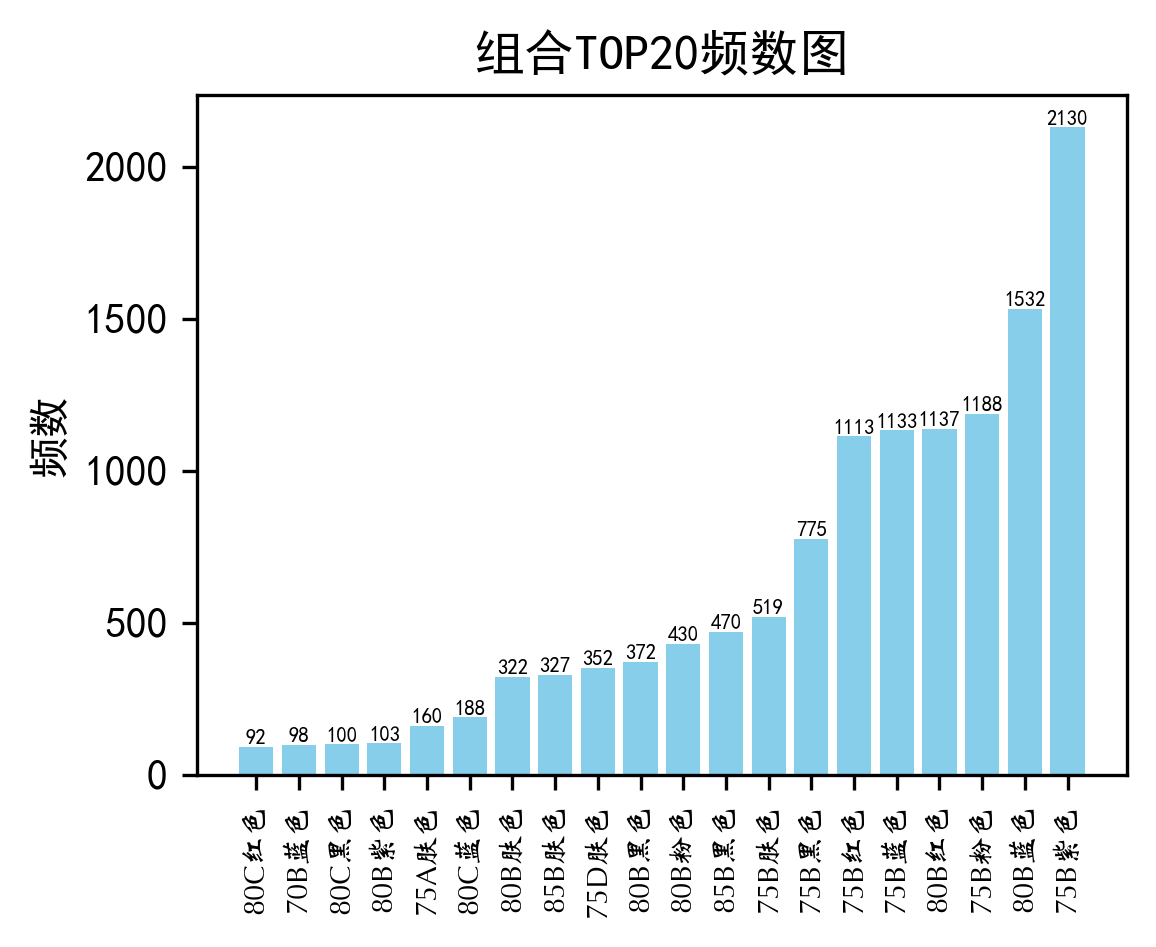

In [9]:
plt.figure(figsize = (4, 3), dpi = 300)
plt.title('组合TOP20频数图')
plt.ylabel('频数')
plt.bar(com_top, com_count_top, color = 'skyblue')
plt.xticks(com_top, rotation = 90, fontproperties = my_font, fontsize = 7)
for a, b in zip(com_top, com_count_top):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontsize = 5)
plt.show()